In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/AI/CuoiKi_1

/content/drive/MyDrive/AI/CuoiKi_1


In [3]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training=train_data.flow_from_directory('/content/drive/MyDrive/AI/CuoiKi_1/Train',target_size=(256,256), batch_size=32, class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/CuoiKi_1/Validation',target_size=(256,256), batch_size=32, class_mode='categorical')

Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(256,256,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

In [6]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 20 lần học (epochs), mỗi lần học thì chỉ học␣256 dữ liệu (batch_size)
history=model.fit(training,epochs=40,batch_size=16,verbose=1, validation_data=validation)

Epoch 1/40
10/10 [==============================] - 137s 12s/step - loss: 9.6594 - accuracy: 0.2133 - val_loss: 1.5261 - val_accuracy: 0.3100
Epoch 2/40
10/10 [==============================] - 13s 1s/step - loss: 1.5302 - accuracy: 0.2700 - val_loss: 1.4512 - val_accuracy: 0.2800
Epoch 3/40
10/10 [==============================] - 13s 1s/step - loss: 1.4517 - accuracy: 0.3633 - val_loss: 1.1883 - val_accuracy: 0.5000
Epoch 4/40
10/10 [==============================] - 11s 1s/step - loss: 1.3337 - accuracy: 0.4000 - val_loss: 1.2428 - val_accuracy: 0.4400
Epoch 5/40
10/10 [==============================] - 12s 1s/step - loss: 1.2605 - accuracy: 0.4533 - val_loss: 1.2769 - val_accuracy: 0.5100
Epoch 6/40
10/10 [==============================] - 12s 1s/step - loss: 1.1345 - accuracy: 0.5167 - val_loss: 1.0386 - val_accuracy: 0.5600
Epoch 7/40
10/10 [==============================] - 12s 1s/step - loss: 1.1590 - accuracy: 0.5233 - val_loss: 1.1200 - val_accuracy: 0.5100
Epoch 8/40
10/10 [

In [7]:
# Lưu 
model.save("CuoiKi.h5")
model_1=load_model('CuoiKi.h5')

In [8]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.15415412187576294
Train Accuracy 0.9433333277702332


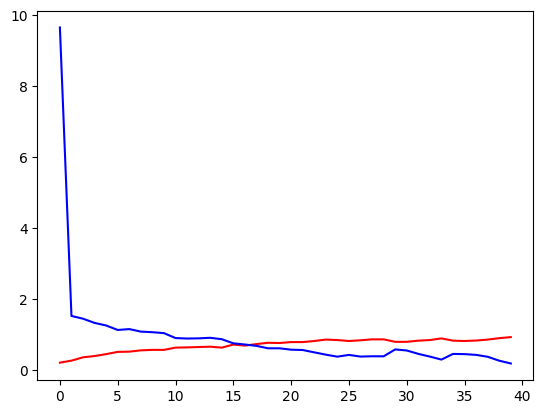

In [9]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

1/1 [==============================] - 1s 765ms/step
Chim cánh cụt Hoàng Đế: chủ yếu ở xung quanh Nam Georgia và quần đảo Sandwich Nam; cao khoảng 1,2m và nặng khoảng 40kg


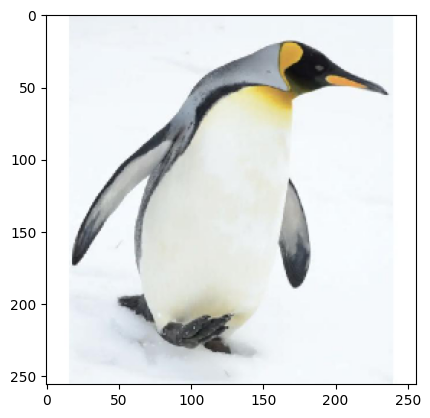

1/1 [==============================] - 0s 36ms/step
Gấu Kodiak: chủ yếu sống trên đảo Kodiak, Alaska, Mỹ và Bắc Canada; là một trong những động vật nguy hiểm nhất Bắc Mỹ


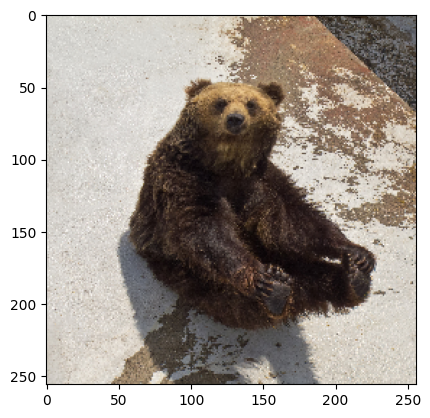

1/1 [==============================] - 0s 28ms/step
Sư tử Congo: sinh sống chủ yếu ở Châu Phi; là động vật ký sinh lớn thứ hai sống trên đất liền sau con người và là loài sư tử lớn thứ hai trên thế giới


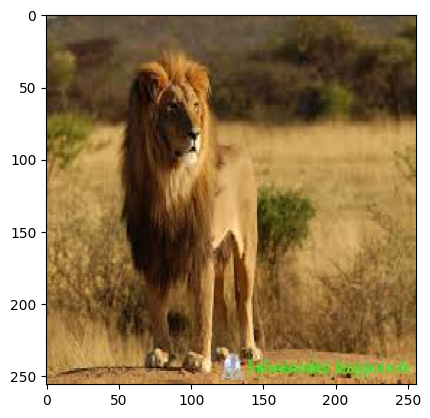

1/1 [==============================] - 0s 21ms/step
Hổ Siberia: chủ yếu sinh sống ở miền đông Nga; là loài hổ lớn nhất và là một trong những động vật nguy hiểm nhất thế giới


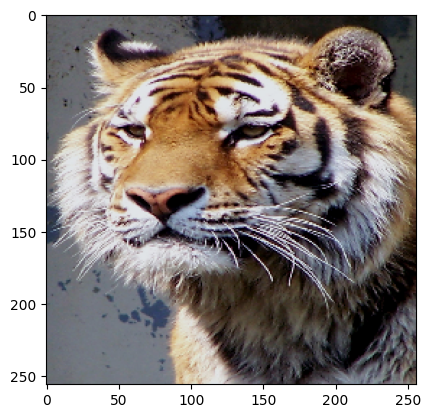

1/1 [==============================] - 0s 30ms/step
Voi Châu Phi: sinh sống chủ yếu từ miền Nam sa mạc Sahara tới Nam Phi; do nạn săn bắn trái phép và mất môi trường sống nên số lượng voi Châu Phi đang giảm rất nhanh


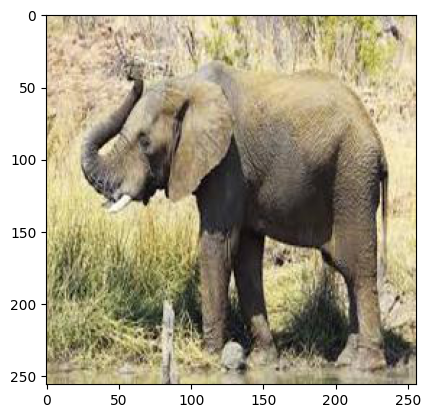

In [10]:
test="/content/drive/MyDrive/AI/CuoiKi_1/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(256,256))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Chim cánh cụt Hoàng Đế: chủ yếu ở xung quanh Nam Georgia và quần đảo Sandwich Nam; cao khoảng 1,2m và nặng khoảng 40kg','Gấu Kodiak: chủ yếu sống trên đảo Kodiak, Alaska, Mỹ và Bắc Canada; là một trong những động vật nguy hiểm nhất Bắc Mỹ','Hổ Siberia: chủ yếu sinh sống ở miền đông Nga; là loài hổ lớn nhất và là một trong những động vật nguy hiểm nhất thế giới','Sư tử Congo: sinh sống chủ yếu ở Châu Phi; là động vật ký sinh lớn thứ hai sống trên đất liền sau con người và là loài sư tử lớn thứ hai trên thế giới','Voi Châu Phi: sinh sống chủ yếu từ miền Nam sa mạc Sahara tới Nam Phi; do nạn săn bắn trái phép và mất môi trường sống nên số lượng voi Châu Phi đang giảm rất nhanh']
  print(class_name[result])
  plt.show()